 #                  A deeper look into Rolling Stone's 500 Greatest Albums of All Time

In [1]:
# Importing libraries needed for this project
import os
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#importing csv file to notebook
music = pd.read_csv("albumlist.csv")

In [3]:
# Creating an sql database
music.to_sql('music', sqlite3.connect('albumlist.db'), if_exists = "replace")

In [4]:
# connectiong to SQL database
con = sqlite3.connect('albumlist.db')
# Calling database
music


,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock"
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave"
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock,"Rock & Roll, Pop Rock, Psychedelic Rock, Exper..."


##  First question: What are the top genres in the top 500 list, that have more than 10 top albums in it???

In [5]:
# Making first variable to genre_count so I know what its called and its purpose. 
genre_count = pd.read_sql_query("SELECT genre, COUNT(genre) AS top_genres FROM music GROUP BY genre HAVING COUNT(*) >= 10", con);

In [6]:
# Calling to new table. 
genre_count

,Genre,top_genres
0,"Electronic, Rock",19
1,"Folk, World, & Country",13
2,Funk / Soul,38
3,Hip Hop,29
4,Rock,249
5,"Rock, Blues",16
6,"Rock, Pop",18


### It looks like Rock is the top genre on the list, followed by Funk/Soul and Hip Hop.

#### Let's graph the results. 

Text(0, 0.5, 'Total number of albums')

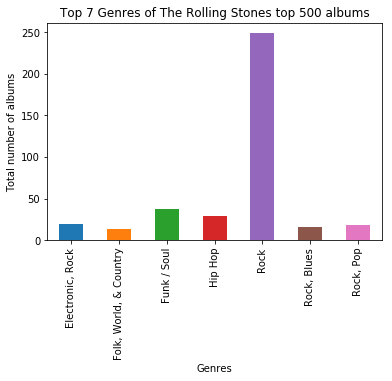

In [7]:
# Now its time to plot the results. I chose a bar graph, because it really shows the difference between the genres.
my_plot = genre_count.plot(kind='bar', x='Genre', y='top_genres', legend=None,title="Top 7 Genres of The Rolling Stones top 500 albums")
my_plot.set_xlabel("Genres")
my_plot.set_ylabel("Total number of albums")

## Next question: Which decade has the most top 500 albums in it?

In [8]:
# I first had to set a range for each decade, than union them together so it would be on one table, which would make it easier for me to display. This took me a while, but we figured it out. 
# Setting up a query, just so I dont have to type it out so much.

query = """SELECT COUNT(year) AS Counts, 2010 AS decade FROM music WHERE year BETWEEN 2010 AND 2019 
UNION
SELECT COUNT(year) AS counts, 2000 AS decade FROM music WHERE year BETWEEN 2000 AND 2009
UNION
SELECT COUNT(year) AS counts, 1990 AS decade FROM music WHERE year BETWEEN 1990 AND 1999
UNION
SELECT COUNT(year) AS counts, 1980 AS decade FROM music WHERE year BETWEEN 1980 AND 1989
UNION
SELECT COUNT(year) AS counts, 1970 AS decade FROM music WHERE year BETWEEN 1970 AND 1979
UNION
SELECT COUNT(year) AS counts, 1960 AS decade FROM music WHERE year BETWEEN 1960 AND 1969
UNION
SELECT COUNT(year) AS counts, 1950 AS decade FROM music WHERE year BETWEEN 1950 AND 1959 ORDER BY decade;"""

In [9]:
# This is setting up another table, showing how many albums are from each decade range. 
decades_2 = pd.read_sql_query(query, con);

In [10]:

decades_2

,Counts,decade
0,10,1950
1,105,1960
2,186,1970
3,85,1980
4,72,1990
5,40,2000
6,2,2010


### It looks like the 70's has the most album's. I was a little disappointed by this. I thought the 60's would have had the most. 

#### Let's graph these results.

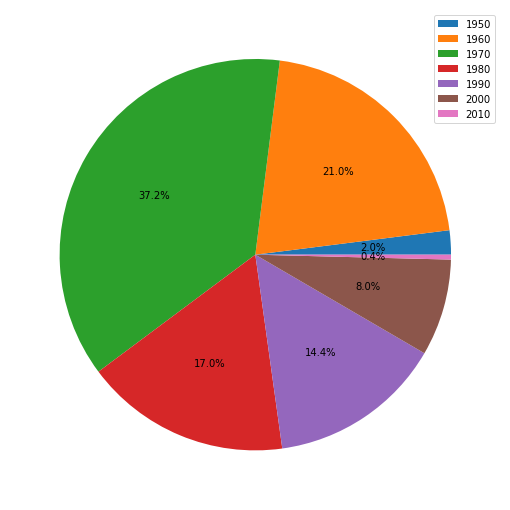

In [11]:
# Now I want to display the results. I chose a pie chart because it displays all the information about the entire original album list and it gives percentages so you can clearly idenify which has most. 
plt.figure(figsize = (9, 9))
x = decades_2.Counts
plt.pie(x, autopct='%1.1f%%')
plt.legend(labels = decades_2.decade, loc='upper right')
plt.show()

##### This makes it a bit easier to see the breakdown of the top 500 albums.

## Now I want to see, which artist appeared on the list the most. 

In [12]:
# Setting up a new table. 
artist = pd.read_sql_query("SELECT artist FROM music GROUP BY artist", con);

In [13]:
artist

,Artist
0,A Tribe Called Quest
1,ABBA
2,AC/DC
3,Aerosmith
4,Al Green
5,Albert King
6,Alice Cooper
7,Amy Winehouse
8,Arcade Fire
9,Arctic Monkeys


#### This gave me every artist on the list, not their count. So, now I want to count each time they had an album on the list. 

In [14]:
# These are all the different artist within the album list. 
# This is adding the name of artist to albums. 
artist_2 = pd.read_sql_query("SELECT COUNT(artist) AS total, artist FROM music GROUP BY artist", con);

In [15]:
artist_2

,total,Artist
0,1,A Tribe Called Quest
1,1,ABBA
2,2,AC/DC
3,2,Aerosmith
4,3,Al Green
5,1,Albert King
6,1,Alice Cooper
7,1,Amy Winehouse
8,1,Arcade Fire
9,1,Arctic Monkeys


### This is still a lot of artist. Let's narrow it down to the artist's that appeared the most, with a limit of 10.

In [16]:
top_artist = pd.read_sql_query("SELECT artist, COUNT(artist) AS top_artist FROM music GROUP BY artist HAVING COUNT(*) >= 5", con);

In [17]:
top_artist

,Artist,top_artist
0,Bob Dylan,10
1,Bruce Springsteen,8
2,David Bowie,5
3,Elton John,5
4,Led Zeppelin,5
5,Radiohead,5
6,The Beatles,10
7,The Rolling Stones,10
8,The Who,7
9,U2,5


### Let's graph the results.

Text(0, 0.5, 'Total number of albums')

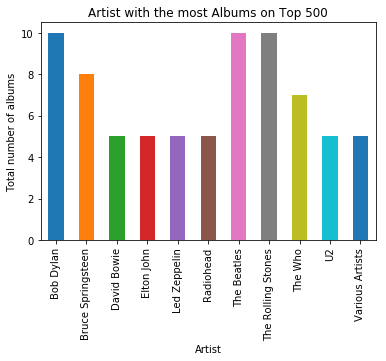

In [18]:
# Now I want to display the results. I again chose a bar graph because it really displays the difference between each artist. 
my_plot = top_artist.plot(kind='bar', x='Artist', y='top_artist', legend=None,title="Artist with the most Albums on Top 500")
my_plot.set_xlabel("Artist")
my_plot.set_ylabel("Total number of albums")


